# WeatherPy
----

### Analysis
* as cities approach the equator, they do in fact get hotter. There is a lot more data points for the northern hemisphere as most of the earth's land mass is in the northern hemisphere. Also, since we are currently in winter in the northern hemisphere, it explains why the temperatures trend downwards as latitude increases, I would expect this to reverse somewhat if we ran this analysis in the summertime.
* There seems to be no correlation between latitude and humidity.However as you approach the equator there is more humidity as there is a large concentration of cities above 90% umidity near the equator.
* There is no strong relationship between latitude and wind speed. Only a few cities have actual high windspeeds over 15 mph. Most cities in this dataset lie below that.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime
# Import API key
import api_keys
from api_keys import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities and country codes
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# base url
url = "http://api.openweathermap.org/data/2.5/weather?"

#dictate imperial units to add to our query
units = "imperial"

#build Query URL
query_url = f'{url}appid={api_key}&units={units}&q='

In [38]:
#create empty lists to store data from API call
temperature = []
humidity = []
cloudiness = []
wind_speed = []
latitude = []
longitude = []
dates = []
country = []
city = []
#make API call
for x in range(len(cities)):
    response = requests.get(f"{query_url}{cities[x]}").json()
    
    # Some of the cities we generate don't have data in openweathermap, so set their values to numpy's NaN
    try:
        city.append(response['name'])
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
        country.append(np.nan)
        city.append(np.nan)
        cloudiness.append(np.nan)
    print(f"Processing record {x + 1} | {cities[x]}")
    

Processing record 1 | boden
Processing record 2 | provideniya
Processing record 3 | castro
Processing record 4 | chuy
Processing record 5 | nyanguge
Processing record 6 | hermanus
Processing record 7 | ushuaia
Processing record 8 | georgetown
Processing record 9 | bluff
Processing record 10 | lagoa
Processing record 11 | qaanaaq
Processing record 12 | mys shmidta
Processing record 13 | katobu
Processing record 14 | kahului
Processing record 15 | hobart
Processing record 16 | punta arenas
Processing record 17 | chokurdakh
Processing record 18 | akureyri
Processing record 19 | galiwinku
Processing record 20 | hilo
Processing record 21 | albany
Processing record 22 | palabuhanratu
Processing record 23 | nikolskoye
Processing record 24 | udachnyy
Processing record 25 | sao filipe
Processing record 26 | rikitea
Processing record 27 | deputatskiy
Processing record 28 | altamira
Processing record 29 | kapaa
Processing record 30 | celendin
Processing record 31 | avarua
Processing record 32 | n

Processing record 249 | pangnirtung
Processing record 250 | lephepe
Processing record 251 | grand gaube
Processing record 252 | chagda
Processing record 253 | flin flon
Processing record 254 | certeju de sus
Processing record 255 | dwarka
Processing record 256 | amahai
Processing record 257 | balkanabat
Processing record 258 | ballina
Processing record 259 | marsa matruh
Processing record 260 | pochutla
Processing record 261 | barabai
Processing record 262 | north bend
Processing record 263 | kenai
Processing record 264 | tuatapere
Processing record 265 | erenhot
Processing record 266 | najran
Processing record 267 | garowe
Processing record 268 | salcininkai
Processing record 269 | tautira
Processing record 270 | ixtapa
Processing record 271 | ponta do sol
Processing record 272 | khilok
Processing record 273 | tucuma
Processing record 274 | dikson
Processing record 275 | pringsewu
Processing record 276 | korla
Processing record 277 | pingzhuang
Processing record 278 | santa isabel
Pro

Processing record 496 | ferrol
Processing record 497 | jutai
Processing record 498 | toamasina
Processing record 499 | kuche
Processing record 500 | kolyshley
Processing record 501 | praia da vitoria
Processing record 502 | stevens point
Processing record 503 | coahuayana
Processing record 504 | mouila
Processing record 505 | caraquet
Processing record 506 | taoudenni
Processing record 507 | lensk
Processing record 508 | poum
Processing record 509 | dawson creek
Processing record 510 | puteyets
Processing record 511 | puerto leguizamo
Processing record 512 | saint-francois
Processing record 513 | san patricio
Processing record 514 | kieta
Processing record 515 | tandil
Processing record 516 | micomeseng
Processing record 517 | veinticinco de mayo
Processing record 518 | clyde river
Processing record 519 | rawah
Processing record 520 | suhbaatar
Processing record 521 | gbarnga
Processing record 522 | meiganga
Processing record 523 | minudasht
Processing record 524 | bantou
Processing re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
# Assemble everything into a dictionary
weather_dict = {"Date": dates,
                "City": cities,
                "Country": country,
                "Latitude": latitude,
                "Longitude": longitude,
                "MaxTemp": temperature,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Wind Speed": wind_speed
}

In [48]:
#build DataFrame from dictionary above
weather_df = pd.DataFrame(weather_dict)

#drop Nan
weather_df = weather_df.dropna(axis=0, how="any")

#print 
weather_df.head(10)

,Date,City,Country,Latitude,Longitude,MaxTemp,Humidity,Cloudiness,Wind Speed
0,1.551578e+09,boden,SE,65.83,21.69,-0.41,84.0,0.0,5.82
1,1.551581e+09,provideniya,RU,64.42,-173.23,27.12,94.0,24.0,10.00
2,1.551578e+09,castro,CL,-42.48,-73.76,50.00,87.0,76.0,3.36
3,1.551581e+09,chuy,UY,-33.69,-53.46,64.33,86.0,0.0,11.23
4,1.551581e+09,nyanguge,TZ,-2.54,33.20,72.21,84.0,32.0,3.62
5,1.551580e+09,hermanus,ZA,-34.42,19.24,64.99,89.0,24.0,1.01
6,1.551578e+09,ushuaia,AR,-54.81,-68.31,50.00,66.0,40.0,3.36
7,1.551578e+09,georgetown,GY,6.80,-58.16,78.80,83.0,40.0,4.70
8,1.551581e+09,bluff,AU,-23.58,149.07,88.81,39.0,76.0,14.03
9,1.551581e+09,lagoa,PT,37.14,-8.45,54.00,87.0,0.0,2.24


In [49]:
weather_df.count()

Date          554
City          554
Country       554
Latitude      554
Longitude     554
MaxTemp       554
Humidity      554
Cloudiness    554
Wind Speed    554
dtype: int64

In [50]:
#save to a csv file
weather_df.to_csv("Weather_Data.csv", index=False)

In [53]:
# Convert Unix Time Stamp to regular date by using datetime library
tmpDate = datetime.datetime.fromtimestamp(int(weather_df["Date"][0])).strftime('%Y-%m-%d')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

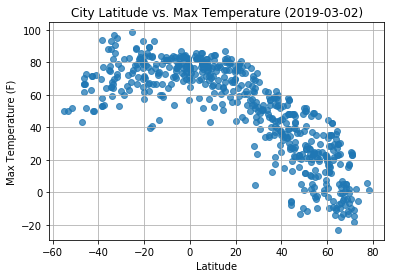

In [57]:
# Build a scatter plot for max temp vs latitude
plt.scatter(weather_df["Latitude"],weather_df["MaxTemp"], marker="o", alpha = 0.75)

# add title and axis titles and grid
plt.title("City Latitude vs. Max Temperature (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/MaxTmp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

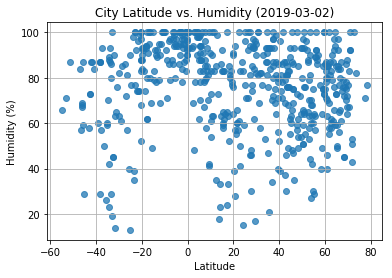

In [58]:
# Build a scatter plot for humidity vs lat
plt.scatter(weather_df["Latitude"],weather_df["Humidity"], marker="o", alpha = 0.75)

# add titles and grid
plt.title("City Latitude vs. Humidity (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

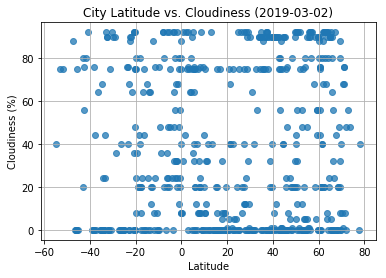

In [59]:
# Build a scatter plot for cloudiness vs lat
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"], marker="o", alpha = 0.75)

# add titles and grid
plt.title("City Latitude vs. Cloudiness (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

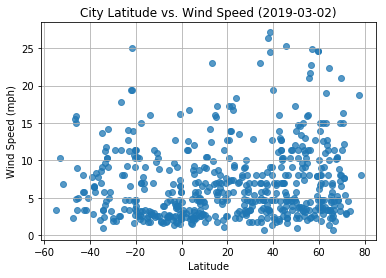

In [60]:
# Build a scatter plot for wind speed
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"], marker="o", alpha = 0.75)

# add title and grid
plt.title("City Latitude vs. Wind Speed (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/WindSpeed.png")

# Show plot
plt.show()